In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import os

In [2]:
co2_file = "Resources/CO2_by_state_working.csv"
co2_df = pd.read_csv(co2_file)

gdp_file = "Resources/GDP_by_state_working.csv"
gdp_df = pd.read_csv(gdp_file)

empl_df = pd.read_csv("Resources/cleanedstateemployment_monthly.csv")

co2_final = pd.DataFrame()

In [3]:
co2_temp = co2_df.set_index("State")
co2_temp.index
temp_co2 = co2_temp.rename(index={"United States total (adjusted state values sum to this)":"Total (Adjusted)"})
#temp_co2

In [4]:
temp_trim = temp_co2.drop(["2017", "Change from 1990 – 2017 %", "Change from 1990 – 2017 Absolute"], axis=1)
co2_data = temp_trim.loc["Total (Adjusted)"].tolist()
years = [int(i) for i in temp_trim.columns.values]
yf = years[10:]
co2f = co2_data[10:]
co2_final["Year"] = yf
co2_final["CO2 Values"] = co2f
co2_final["Rate CO2 Change"] = co2_final["CO2 Values"].pct_change()*100
co2_final = co2_final.set_index("Year")
co2_final

,CO2 Values,Rate CO2 Change
Year,,
2000,5862,NaN
2001,5760,-1.740020
2002,5802,0.729167
2003,5852,0.861772
2004,5971,2.033493
2005,5991,0.334952
2006,5911,-1.335336
2007,6001,1.522585
2008,5812,-3.149475


In [5]:
empl_df = empl_df.drop(["Month", "1-Month % Change"], axis=1)
empl_df = empl_df.groupby(["State", "Year"]).mean()
#empl_df.reset_index()
emp_df = empl_df.groupby(["Year"]).mean()

In [6]:
emp_df = emp_df.rename(columns={"Value":"Unemployment Rate"})
#emp_df.reset_index(inplace=True)
emp_df

,Unemployment Rate
Year,
2000,3.922173
2001,4.631473
2002,5.375298
2003,5.623214
2004,5.299479
2005,5.043155
2006,4.544494
2007,4.385937
2008,5.435045


In [7]:
emp_df["Unemployement Rate Change"] = emp_df.pct_change()*100
emp_df = emp_df.iloc[:17]
emp_df

,Unemployment Rate,Unemployement Rate Change
Year,,
2000,3.922173,NaN
2001,4.631473,18.084380
2002,5.375298,16.060212
2003,5.623214,4.612148
2004,5.299479,-5.757119
2005,5.043155,-4.836785
2006,4.544494,-9.887873
2007,4.385937,-3.488981
2008,5.435045,23.919792


In [8]:
emp_years = emp_df.index
emp_years

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Year')

In [9]:
co2_years = co2_final.index
co2_years

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Year')

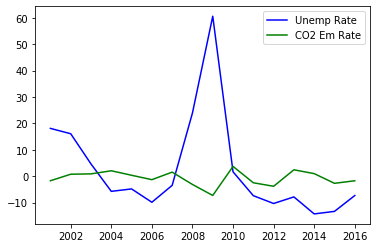

In [14]:
unemployment_rate, = plt.plot(emp_years, emp_df["Unemployement Rate Change"], color="blue", label="Unemp Rate")
co2_emm_rate, = plt.plot(co2_years, co2_final["Rate CO2 Change"], color="green", label="CO2 Em Rate")
plt.legend()
plt.savefig("Output/UnEmployment v Emissions")
plt.show()

In [18]:
merged_df = emp_df.merge(co2_final, left_index=True, right_index=True)

In [19]:
merged_df

,Unemployment Rate,Unemployement Rate Change,CO2 Values,Rate CO2 Change
Year,,,,
2000,3.922173,NaN,5862,NaN
2001,4.631473,18.084380,5760,-1.740020
2002,5.375298,16.060212,5802,0.729167
2003,5.623214,4.612148,5852,0.861772
2004,5.299479,-5.757119,5971,2.033493
2005,5.043155,-4.836785,5991,0.334952
2006,4.544494,-9.887873,5911,-1.335336
2007,4.385937,-3.488981,6001,1.522585
2008,5.435045,23.919792,5812,-3.149475
